# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Make base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Set inital counters
sets = 1
count = 0
reset = 0

# Make empty lists and fill data as we loop
filtered_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
response_weather_json = []


# Loop through each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    
    # Build query url for each city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Check to see if city is found. If it isn't skip city
    if weather_json['cod'] == '404':
        print('City not found. Skipping...')

    # If city is found append data to response list
    else:
        count += 1
        print(f"Processing Record {count} of Set {sets} | {city}")
        
        filtered_cities.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        response_weather_json.append(weather_json)
        
    
    # Every 50 API pulls pause for a minute so that we don't lock our account with OpenWeather
    reset += 1
    if reset == 50:
        time.sleep(60)
        sets += 1
        count = 0
        reset = 0

print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | talaya
Processing Record 3 of Set 1 | dandong
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | salekhard
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | macia
Processing Record 14 of Set 1 | nkoteng
Processing Record 15 of Set 1 | mormugao
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | half moon bay
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of S

Processing Record 3 of Set 5 | kaeo
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | ampanihy
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | puerto ayora
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | ikare
Processing Record 11 of Set 5 | manokwari
Processing Record 12 of Set 5 | provideniya
Processing Record 13 of Set 5 | haines junction
Processing Record 14 of Set 5 | harnoli
Processing Record 15 of Set 5 | vanimo
Processing Record 16 of Set 5 | gorin
Processing Record 17 of Set 5 | lebu
Processing Record 18 of Set 5 | maningrida
Processing Record 19 of Set 5 | paris
Processing Record 20 of Set 5 | nhulunbuy
Processing Record 21 of Set 5 | riyadh
Processing Record 22 of Set 5 | bengkulu
Processing Record 23 of Set 5 | cabedelo
Processing Record 24 of Set 5 | upernavik
Processing Record 25 of Set 5 | acapulco
Processing Record 26 of Set 5 | huai thalaeng
Proces

Processing Record 7 of Set 9 | swinoujscie
Processing Record 8 of Set 9 | chuy
Processing Record 9 of Set 9 | matagami
Processing Record 10 of Set 9 | mabaruma
Processing Record 11 of Set 9 | bose
Processing Record 12 of Set 9 | narok
Processing Record 13 of Set 9 | saint-pierre
Processing Record 14 of Set 9 | ouro preto do oeste
Processing Record 15 of Set 9 | adrar
Processing Record 16 of Set 9 | marzuq
Processing Record 17 of Set 9 | acarau
Processing Record 18 of Set 9 | katherine
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 9 | martapura
Processing Record 20 of Set 9 | husavik
Processing Record 21 of Set 9 | homer
Processing Record 22 of Set 9 | skjervoy
Processing Record 23 of Set 9 | the valley
Processing Record 24 of Set 9 | honolulu
Processing Record 25 of Set 9 | gidole
Processing Record 26 of Set 9 | tura
Processing Record 27 of Set 9 | araguaina
Processing Record 28 of Set 9 | paramonga
Processing Record 29 of Set 9 | alim
Processing R

Processing Record 11 of Set 13 | sokolo
Processing Record 12 of Set 13 | sinnamary
Processing Record 13 of Set 13 | umm lajj
Processing Record 14 of Set 13 | mackay
Processing Record 15 of Set 13 | bundaberg
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    'City': filtered_cities,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed,
    })
weather_df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1584196146,53,-34.53,20.04,77.00,17.22
1,Talaya,100,RU,1584196146,99,61.38,152.75,-11.11,5.66
2,Dandong,61,CN,1584196146,50,40.13,124.39,36.41,3.49
3,Punta Arenas,75,CL,1584196147,81,-53.15,-70.92,51.80,9.17
4,Airai,58,TL,1584196147,95,-8.93,125.41,66.83,1.43


In [7]:
# Export dataframe to csv file in folder output_data
weather_df.to_csv(output_data_file, index = False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

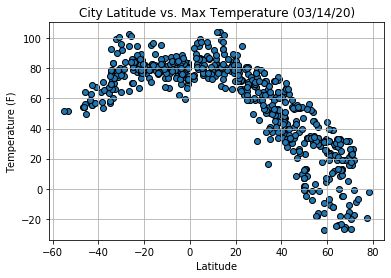

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors='black')

from datetime import date
today = date.today()

# Incorporate the other graph properties
date = today.strftime("%m/%d/%y")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1 - City Latitude vs. Max Temperature (F).png")

plt.show()

From this plot we can see that those cities located around the 0 latitude (Equator) experience the highest max temps over any other cities. Max temps for cities decrese the further you get away from the Equator and the closer you get the north and south poles. There are more cities in the northern hemisphere due to land mass which is why there is more data points on positive latitudes.

#### Latitude vs. Humidity Plot

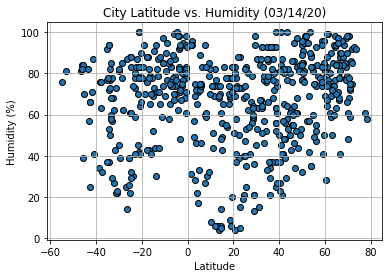

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2 - City Latitude vs. Humidity (%).png")

plt.show()

From this plot it looks hard to distinguish if there is a relationship between latitude and humidity since the data points are scattered.

#### Latitude vs. Cloudiness Plot

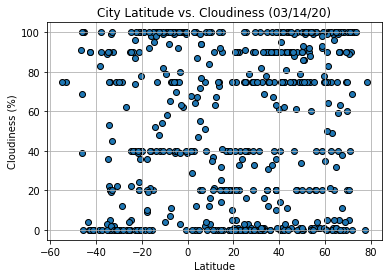

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3 - City Latitude vs. Cloudiness (%).png")

plt.show()

This plot shows for the most of the citites with the same latitude that cloudiness varies from 0 to 100.

#### Latitude vs. Wind Speed Plot

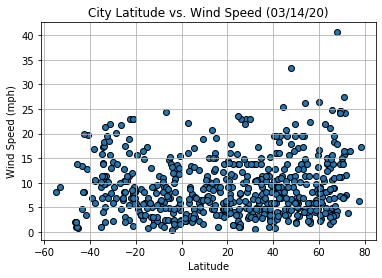

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4 - City Latitude vs. Wind Speed (mph).png")

plt.show()

This plot shows that wind speeds vary for cities of the same latitude making it hard to determine if there is a correlation. Cities further to the north might experience greater wind speeds however data might be skewed due to there being more data points for the northern hemisphere.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plt(x_values, y_values,x_label,y_label,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Talaya,100,RU,1584196146,99,61.38,152.75,-11.11,5.66
2,Dandong,61,CN,1584196146,50,40.13,124.39,36.41,3.49
6,Salekhard,100,RU,1584196147,88,66.53,66.60,12.83,18.21
8,São Filipe,100,CV,1584195875,56,14.90,-24.50,76.37,19.01
9,Cabo San Lucas,40,MX,1584196053,88,22.89,-109.91,66.20,11.41


In [14]:
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0, :]
southern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1584196146,53,-34.53,20.04,77.00,17.22
3,Punta Arenas,75,CL,1584196147,81,-53.15,-70.92,51.80,9.17
4,Airai,58,TL,1584196147,95,-8.93,125.41,66.83,1.43
5,Cape Town,20,ZA,1584196003,50,-33.93,18.42,79.00,11.41
7,Tual,100,ID,1584196147,79,-5.67,132.75,81.59,14.54


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8680782833916879


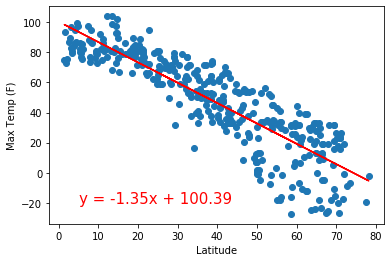

In [15]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
x = 5
y = -20

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4677339334795606


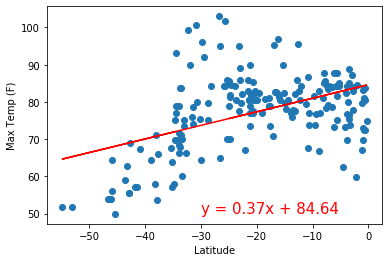

In [16]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
x = -30
y = 50

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

The linear regressions and high R values for each of the plots show there is a strong correlation between the latitude of a city and their max temps. Northern hemishpere has negative correlation (more positive the latitude the lower the max temp) due more positive latitudes representing a move away from the equator and the southern has a positive correlation (more positive the latitude the greater the max temp) due more positive latitudes representing a move to the equator. The southern hemisphere I believe would have even a sstronger correlation if we had gotten more data points. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3318751518851841


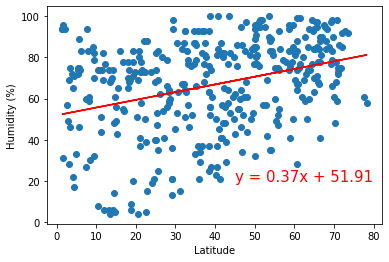

In [17]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
x = 45
y = 20

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3074539193490891


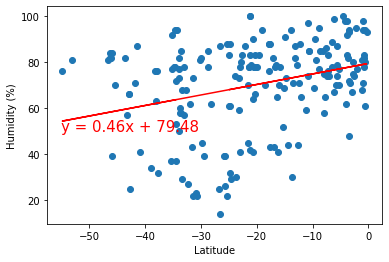

In [18]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
x = -55
y = 50

lin_reg_plt(x_values, y_values,x_label,y_label,x,y)

Both hemispheres had a decent positive correlation between the humidity and latitude. For lower latitudes the data was more spreadout but as the latitudes increase we see that the average humidity increases as well. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21200877028346585


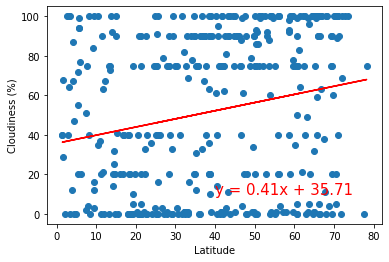

In [19]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x = 40
y = 10

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3457530165556244


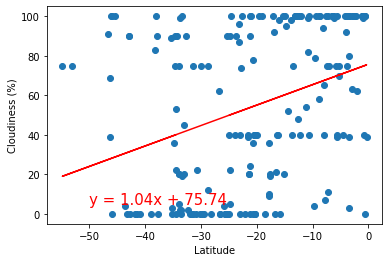

In [20]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x = -50
y = 5

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

For both hemipsheres the cloudiness had no correlation with their latitudes as shown by the R squared values. City latitudes did not effect cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19909821879583478


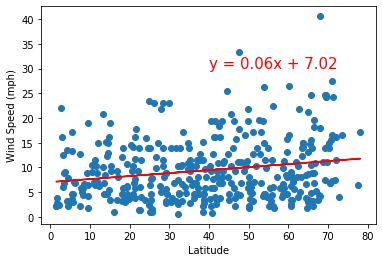

In [21]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
x = 40
y = 30

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20539400922742831


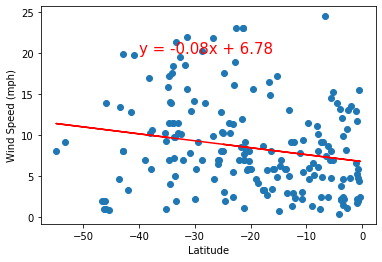

In [22]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
x = -40
y = 20

lin_reg_plt(x_values,y_values,x_label,y_label,x,y)

Wind speeds and latitudes had very weak to no correlation either as shown by their R squared values. 

1. Max temperatures were highest for cities closer to the equator (0 Latitude) and decresed as we got got further away from it for both hemispheres.
2. Humidity and latitude had a decent correlation. The further north you go the more likely the humidity will be higher regardless of which hemishpere you are in. This is expecially true for the northern hemisphere.
3. Cloudiness and windspeed do not correlate with latitude bot for bith hemispheres.